# Creating a Basic Neural Network Model using Pytorch - 1

In [114]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [115]:
#Create a Model Class that inherits nn.Modules
class Model(nn.Module):
    # Input layer (4 features of the flower) -->
    # Hidden layer 1 (number of neurones) -->
    # H2 (n) -->
    # output (3 classes of iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() #instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1) #layer 1
        self.fc2 = nn.Linear(h1,h2) # layer 2
        self.out = nn.Linear(h2,out_features) # output layer
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [116]:
# Pick a manual seed for randomization
torch.manual_seed(31)
# Create an instance of model
model = Model()

# Load Data and Train Neural Network Model - 2

In [117]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [118]:
my_df = pd.read_csv("iris.data")

In [119]:
my_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']
my_df

,sepal_length,sepal_width,petal_length,petal_width,variety
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [120]:
my_df.variety.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [121]:
# Change last column to integer so the model can understand the class
my_df['variety'] = my_df['variety'].replace('Iris-setosa', 0)
my_df['variety'] = my_df['variety'].replace('Iris-versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Iris-virginica', 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_36956\2760847642.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Iris-virginica', 2)


In [122]:
my_df.variety.unique()

array([0, 1, 2], dtype=int64)

In [123]:
X = my_df.drop(['variety'], axis=1)
y = my_df['variety']

In [124]:
#Convert these to numpy arrays
X = X.values
y = y.values

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [127]:
# Convert X Features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [128]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [129]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iteration (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005) # The lower your learning rate the longer the model takes to train

In [130]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [131]:
# train our model
#Epochs? (one run thru all the training data in our network)
epochs = 200
losses = []
for i in range(epochs):
    # Go forward to get a prediction
    y_pred = model.forward(X_train) # Get predicted results

    # Measure the loss/error, gonna be high at first
    loss = criterion(y_pred,y_train) # Preicted values vs y_train

    # Keep track of our losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
        print(f'Epochs: {i} and loss: {loss}')

    # Do some back propagation: take the error rate of forward propagation and feed it back
    # thru the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epochs: 0 and loss: 1.0947797298431396
Epochs: 10 and loss: 1.0125598907470703
Epochs: 20 and loss: 0.9453644156455994
Epochs: 30 and loss: 0.8488494753837585
Epochs: 40 and loss: 0.7337754964828491
Epochs: 50 and loss: 0.6120119690895081
Epochs: 60 and loss: 0.509672999382019
Epochs: 70 and loss: 0.43485549092292786
Epochs: 80 and loss: 0.37888211011886597
Epochs: 90 and loss: 0.3312995135784149
Epochs: 100 and loss: 0.28670257329940796
Epochs: 110 and loss: 0.24434632062911987
Epochs: 120 and loss: 0.20602956414222717
Epochs: 130 and loss: 0.17358413338661194
Epochs: 140 and loss: 0.14768455922603607
Epochs: 150 and loss: 0.12774844467639923
Epochs: 160 and loss: 0.1126408502459526
Epochs: 170 and loss: 0.10119116306304932
Epochs: 180 and loss: 0.09243039041757584
Epochs: 190 and loss: 0.08562643826007843


Text(0.5, 0, 'Epochs')

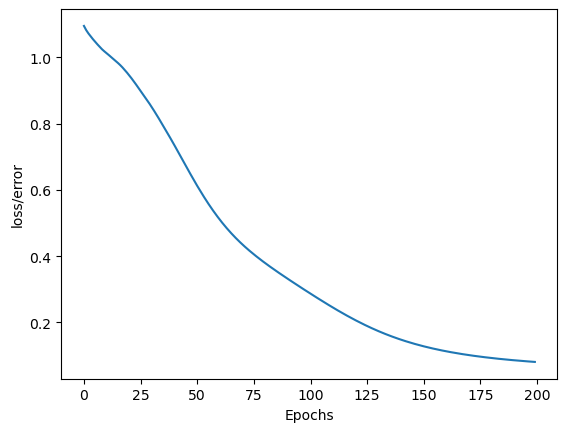

In [132]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")

## Evaluate Test Data Set On Network - Deep Learning with PyTorch 7

In [133]:
# Evaluate the Model on test data set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
    y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
    loss = criterion(y_eval, y_test) # Find the loss/error

In [134]:
loss

tensor(0.0650)

In [136]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        # Will tell us what type of flower class our network think it is
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        # Correct or not
        if y_val.argmax().item()  == y_test[i]:
            correct+=1

print(f'We got {correct} out of {len(y_test)} correctly! \t Correct percentage: {correct/len(y_test)*100}%')

1.) tensor([  8.3674,   3.2339, -11.5963]) 	 0 	 0
2.) tensor([-4.9749,  2.8553,  7.0912]) 	 2 	 2
3.) tensor([  9.5564,   3.6078, -13.2875]) 	 0 	 0
4.) tensor([-5.9648,  3.2094,  8.4638]) 	 2 	 2
5.) tensor([-1.5690,  4.9820,  1.6592]) 	 1 	 1
6.) tensor([-1.3674,  4.4274,  1.4820]) 	 1 	 1
7.) tensor([-0.8521,  4.9862,  0.6098]) 	 1 	 1
8.) tensor([  8.5124,   3.2792, -11.8021]) 	 0 	 0
9.) tensor([  9.1824,   3.4865, -12.7553]) 	 0 	 0
10.) tensor([  8.9559,   3.4158, -12.4331]) 	 0 	 0
11.) tensor([-3.8048,  3.9792,  5.1417]) 	 2 	 2
12.) tensor([-3.2894,  3.9023,  4.4042]) 	 2 	 2
13.) tensor([-4.2623,  3.7332,  5.8630]) 	 2 	 2
14.) tensor([ 0.2516,  4.7776, -0.8890]) 	 1 	 1
15.) tensor([-5.7722,  3.6011,  8.0992]) 	 2 	 2
16.) tensor([-1.5418,  4.4977,  1.7221]) 	 1 	 1
17.) tensor([  8.3253,   3.2207, -11.5366]) 	 0 	 0
18.) tensor([-1.7007,  4.8572,  1.8783]) 	 1 	 1
19.) tensor([-0.6944,  5.3452,  0.3031]) 	 1 	 1
20.) tensor([-0.3965,  4.6687,  0.0108]) 	 1 	 1
21.) tensor